# Prevendo nivel de satisfação dos clientes santander

Problema de negócio:
Identificar o nivel de clientes insatisfeitos no inicio do relacionamento
Trabalho é um problema de classificação para identificar se cliente deixou ou não deixou de ser cliente do banco

Dados estão no kaggle
https://www.kaggle.com/c/santander-customer-satisfaction


In [1]:
# importando bibliotecas
#!pip install missingno
import pandas as pd
import missingno as msn
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# impordando o dataset de treino
santander_DF = pd.read_csv('./santander-customer-satisfaction/train.csv')

In [3]:
# vendo as primeiras 5 linhas do dataset
santander_DF.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<AxesSubplot:>

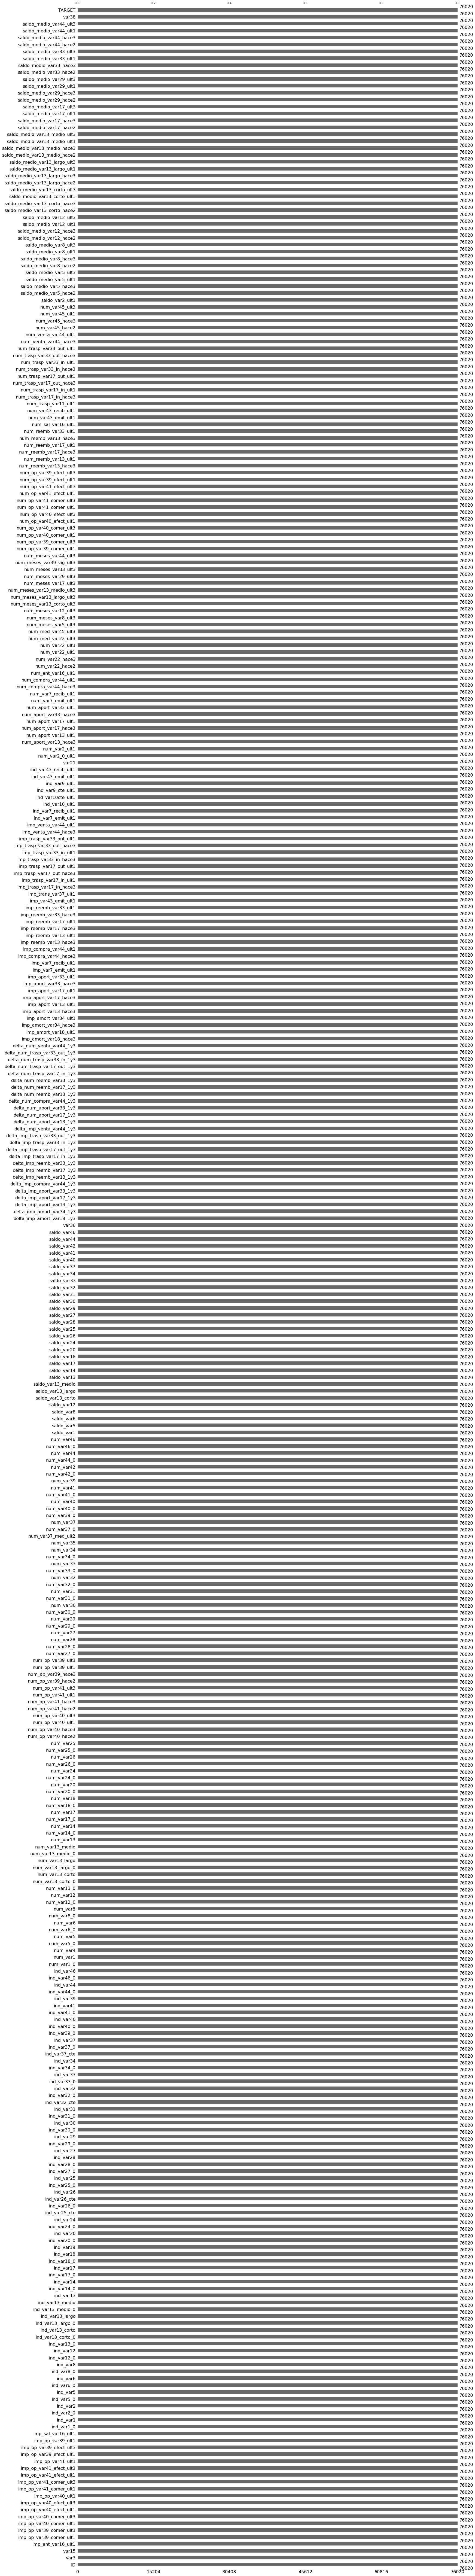

In [4]:
# verificando de forma grafica se o dataset possui dados missing
msn.bar(santander_DF)

In [5]:
# verificando se o dataset possui dados missing
santander_DF.isna().values.any()

False

In [6]:
# verificando estatisticas descritivas de cada coluna do dataset
santander_DF.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
# removendo coluna ID
santander_DF = santander_DF.drop(['ID'], axis=1)

efetuando previsão sem um trabalho de preprocessamento

In [8]:
#separando em dados de treino e test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(santander_DF, santander_DF['TARGET'], test_size = 0.30, random_state = 5)


In [9]:
# treinando modelo (instanciando LogisticRegression, chamando a função fit passando os dados de treino,
# exibindo estatisticas do treino). 
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)
modelo.score(X_train, Y_train)

0.9593903859886496

In [10]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(modelo, X_test, Y_test, cv=5, scoring='roc_auc')

print("Acurácia Final %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final 59.844%


In [11]:
valores_previstos = modelo.predict(X_test)

# relatório de classificação
from sklearn.metrics import classification_report
print(classification_report(Y_test, valores_previstos))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21959
           1       0.00      0.00      0.00       847

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.93      0.96      0.94     22806



### Precision
Porcentagem de predições foram corretas. Habilidade de não classificar uma instancia positiva como negativa. calculo é feito da seguinte forma TP / (TP + FP)

### Recall
Porcentagem de predições positivas. busca todas as instãncias positivas. calculo é feito da seguint forma TP /(TP + FN)

### F1-score
É a média ponderada do precision e recall que fica entre 0.0 e 1.0. calculo é feito pela seguinte formula 2*(Recall * Precision) / (Recall + Precision)


## Efetuando pré processamento dos dados para buscar uma melhor acurácia

In [12]:
# verificando a correlação entre as colunas
santander_DF.corr()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
var3,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,0.001311,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,0.035884,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,0.011502,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,0.249247,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
imp_op_var39_comer_ult3,0.006817,0.101177,0.034879,0.886476,1.000000,0.316671,0.355670,0.029094,0.055449,0.247707,...,0.027489,0.021819,0.018427,0.020530,0.008539,0.006359,0.010660,0.009822,0.013271,0.003517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,-0.000417,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,-0.000260,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,-0.000356,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,0.003580,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


verificando o skewness (medida de assimetria da distribuição)
 em uma distribuição normal a média divide a curva simetricamente em duas partes iguais e o valor da assimetria é igual a 0
pandas possui um método que calcula a assimetria
se a assimetria estiver entre -0.5 e 0.5 o dado é simetrico
se a assimetria estiver entre -1 e -0.5 ou 5 e 1 o dado estará moderadamente distorcido
se a assimetria estiver menot que -1 ou maior que 1 o dado estará fortemente distorcido

In [13]:

santander_DF.skew().values

array([-2.55415737e+01,  1.57836737e+00,  6.72675118e+01,  9.45429824e+00,
        9.73535075e+00,  4.58345477e+01,  3.86719151e+01,  1.49528499e+02,
        1.12951439e+02,  5.25780318e+01,  9.22599958e+00,  9.54698631e+00,
        3.66674005e+01,  6.19948582e+01,  2.09965579e+01,  3.62496599e+01,
        6.14229440e+01,  2.04769983e+01,  1.81054616e+02,  9.18117130e+00,
        1.62116731e+01,  0.00000000e+00,  0.00000000e+00, -4.56813872e+00,
       -6.93289770e-01,  9.74673022e+01,  1.94957688e+02,  5.24325889e+00,
        5.65672199e+00,  3.44716297e+00,  4.36404701e+00,  4.02426910e+00,
        4.50955718e+00,  4.59939958e+00,  9.76514976e+00,  9.85090065e+00,
        1.94957688e+02,  1.94957688e+02,  4.08876200e+00,  6.26945669e+00,
        1.36252667e+01,  2.34928520e+01,  2.62320322e+01,  1.94957688e+02,
        1.94957688e+02,  1.53401666e+01,  1.65060346e+01,  1.91793245e+01,
        4.54383384e+00,  4.84108818e+00,  5.90493369e+00,  6.13302846e+00,
        5.77200576e+00,  

kurtosis descreve o pico da distribuição
se a distribuição for muito alta (kurtosis > 3)(leptokurtic) os valores em uma distribuição leptocúrtica estão próximos da média ou nos extremos.
se a distribuiçao for muito baixa (kurtosis < 3)(platykurtic) os valores são moderadamente distribuidos
uma distribuiçao que está entre leptokurtic e platykurtic (kurtosis = 3) está mais proximo de uma distribuição normal

uma kurtosis alta pode significar que possui outliers

In [14]:

santander_DF.kurt().values

array([ 6.50389135e+02,  2.51991917e+00,  6.32143513e+03,  1.45398198e+02,
        1.55618112e+02,  2.78768047e+03,  1.88295916e+03,  2.93387372e+04,
        1.67493233e+04,  3.42777837e+03,  1.43022438e+02,  1.49240681e+02,
        2.34712558e+03,  6.71607616e+03,  9.43624076e+02,  2.29277841e+03,
        6.61966197e+03,  8.87508752e+02,  3.74894179e+04,  8.22960716e+01,
        2.60825206e+02,  0.00000000e+00,  0.00000000e+00,  1.88683878e+01,
       -1.51938927e+00,  9.49812488e+03,  3.80074999e+04,  2.54924345e+01,
        2.99992929e+01,  9.88319257e+00,  1.70453547e+01,  1.41951153e+01,
        1.83365884e+01,  1.91549805e+01,  9.33606060e+01,  9.50427441e+01,
        3.80074999e+04,  3.80074999e+04,  1.47183619e+01,  3.73070687e+01,
        1.83652723e+02,  5.49928565e+02,  6.86137565e+02,  3.80074999e+04,
        3.80074999e+04,  2.33326849e+02,  2.70456294e+02,  3.65856114e+02,
        1.86469165e+01,  2.14366987e+01,  3.28691066e+01,  3.56149751e+01,
        3.13168744e+01,  

In [15]:
santander_DF2 = santander_DF.drop('TARGET', axis=1)

In [16]:
# normalizando os dados para ficar na mesma escala, com comprimento igual a 1
# aplicando Normalizer
from sklearn.preprocessing import Normalizer

In [17]:
# instanciando modelo de normalizer
scaler = Normalizer().fit(santander_DF2)

In [18]:
# carregando modelo (treinando), removendo a coluna target
normalizedX = scaler.transform(santander_DF2)

In [19]:
norm_santander_DF = pd.DataFrame(normalizedX, columns=santander_DF2.columns)

In [20]:
norm_santander_DF.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.000051,0.000587,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999997
1,0.000041,0.000690,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999872
2,0.000030,0.000342,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999
3,0.000031,0.000578,0.0,0.003046,0.003046,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999962
4,0.000005,0.000088,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266179


### Aplicando algoritmo de redução de dimensionalidade PCA (Principal Component Analises)



In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(random_state=42)


In [23]:
pca.fit(norm_santander_DF)

PCA(random_state=42)

In [24]:
pca_fitted = PCA(n_components=10, random_state=42)
new_dataset = pd.DataFrame(pca_fitted.fit_transform(norm_santander_DF))

In [25]:
new_dataset['TARGET'] = santander_DF['TARGET']

In [26]:
#separando em dados de treino e test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_dataset, santander_DF['TARGET'], test_size = 0.30, random_state = 5)


In [27]:
new_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,TARGET
0,-0.077180,0.000233,0.003280,-0.008858,0.005700,0.002071,-0.000258,-0.000430,0.001729,0.000853,0
1,-0.069909,0.010619,-0.003617,-0.010617,0.005140,-0.001390,0.000838,0.003253,-0.000551,0.000364,0
2,-0.077151,0.000218,0.003254,-0.008787,0.005647,0.002066,-0.000284,-0.000419,0.001707,0.000860,0
3,-0.076319,-0.000167,0.002506,-0.006075,0.003483,0.001650,-0.001117,-0.000249,0.001630,0.002128,0
4,0.844722,-0.419818,0.004174,0.116783,-0.103230,0.119129,0.594924,-0.163587,-0.055699,0.070384,0


In [28]:
modelo = LogisticRegression()

In [29]:
modelo.fit(X_train, Y_train)
modelo.score(X_train, Y_train)

1.0

In [30]:
valores_previstos = modelo.predict(X_test)


In [31]:
from sklearn.model_selection import cross_val_score


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(valores_previstos, Y_test)

array([[21959,     0],
       [    0,   847]])

In [33]:
# relatório de clasificação
from sklearn.metrics import classification_report

print(classification_report(Y_test, valores_previstos))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21959
           1       1.00      1.00      1.00       847

    accuracy                           1.00     22806
   macro avg       1.00      1.00      1.00     22806
weighted avg       1.00      1.00      1.00     22806



In [34]:
resultado = cross_val_score(modelo, X_test, Y_test, cv=5, scoring='roc_auc')

print("Acurácia Final %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final 100.000%
